In [52]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt

input_file = Path(r"/Users/gelo/REPOS/finm-data-analysis-2024/data/multi_asset_etf_data.xlsx")

## 1. Multivariate Regression

In [48]:
rets_df = pd.read_excel(input_file, sheet_name='total returns',header=0,index_col=0)
portfolio_df = pd.read_excel(input_file, sheet_name='portfolio returns',header=0)
TICKS = list(rets_df.columns[1:])
rets_df.head()

,SPY,EFA,EEM,PSP,QAI,HYG,DBC,IYR,IEF,BWX,TIP,SHV
Date,,,,,,,,,,,,
2009-04-30,0.099346,0.115190,0.155582,0.230203,0.022883,0.138460,-0.001000,0.296151,-0.027453,0.008993,-0.017951,0.000553
2009-05-31,0.058454,0.131918,0.159400,0.053892,0.027865,0.028555,0.162663,0.022728,-0.020773,0.053672,0.019966,-0.000472
2009-06-30,-0.000655,-0.014049,-0.022495,0.045449,-0.003436,0.033517,-0.026259,-0.024863,-0.005571,0.005148,0.001981,0.000599
2009-07-31,0.074606,0.100415,0.110146,0.143247,0.015326,0.069190,0.018568,0.105799,0.008317,0.031284,0.000879,-0.000027
2009-08-31,0.036940,0.045030,-0.013136,0.033413,-0.004151,-0.016969,-0.040365,0.131939,0.007635,0.007628,0.008413,0.000436


### 1.1 Correlation

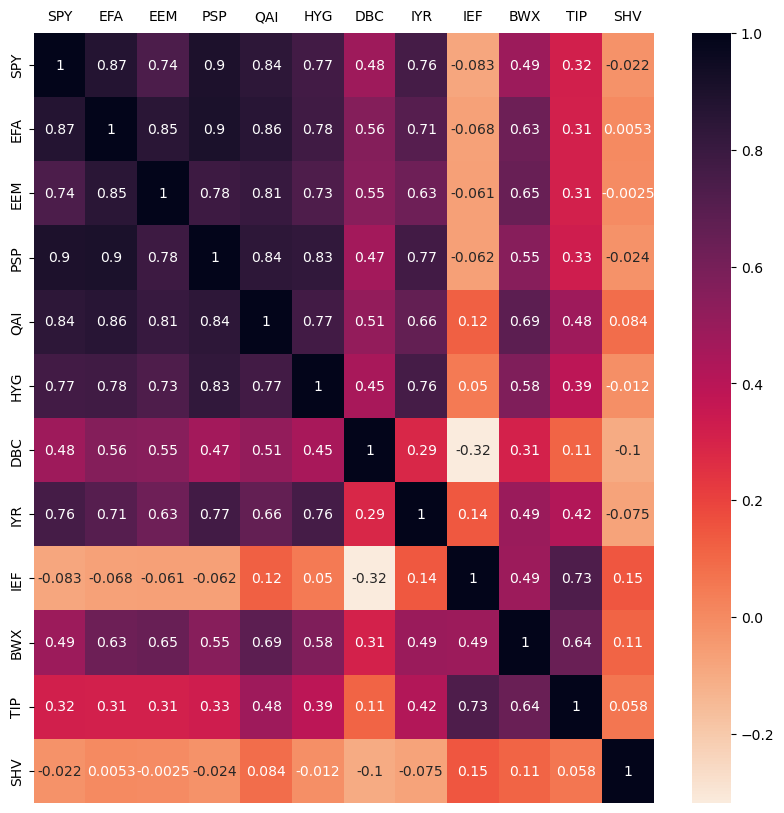

In [49]:
rets_corrMatrix =rets_df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(rets_corrMatrix, cmap='rocket_r', annot=True)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)

* Highest CORR: SPY/PSP and EFA/PSP = 0.9 <br>
* Lowest CORR: DBS/IEF = -0.32

### 1.2 Multivariate Regression
$$r_t^{\text{PSP}} = \alpha + \boldsymbol{\beta}\boldsymbol{r}_t + \epsilon_t$$

where $\boldsymbol{r}_t$ denotes the vector of all the other returns (excluding PSP) at time $t$.

In [72]:
y = rets_df['PSP']
x = rets_df.drop(columns=['PSP'])
X = sm.add_constant(x)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PSP   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     132.1
Date:                Fri, 02 Aug 2024   Prob (F-statistic):           3.29e-77
Time:                        12:35:43   Log-Likelihood:                 443.72
No. Observations:                 182   AIC:                            -863.4
Df Residuals:                     170   BIC:                            -825.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0016      0.002     -0.794      0.428      -0.006       0.002
SPY            0.3688      0.104      3.559      0.000       0.164       0.573
EFA            0.5673      0.100      5.645      0.000       0.369       0.766
EEM           -0.0186      0.064     -0.292      0.770      -0.144       0.107
QAI            0.5981      0.288      2.074      0.040       0.029       1.167
HYG            0.4768      0.123      3.890      0.000       0.235       0.719
DBC           -0.1177      0.046     -2.552      0.012      -0.209      -0.027
IYR            0.1207      0.055      2.190      0.030       0.012       0.230
IEF           -0.3959      0.192     -2.057      0.041      -0.776      -0.016
BWX           -0.0324      0.133     -0.243      0.808      -0.295       0.230
TIP            0.2240      0.210      1.064      0.289      -0.191       0.639
SHV           -0.7769      1.262     -0.615      0.539      -3.269       1.715
==============================================================================
Omnibus:                        5.506   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                6.760
Skew:                          -0.194   Prob(JB):                       0.0340
Kurtosis:                       3.861   Cond. No.                         780.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
betas = results.params.to_string()
print(betas)

const   -0.001640
SPY      0.368790
EFA      0.567267
EEM     -0.018582
QAI      0.598149
HYG      0.476792
DBC     -0.117711
IYR      0.120730
IEF     -0.395851
BWX     -0.032385
TIP      0.223968
SHV     -0.776883


* Estimated $\alpha$: -0.0016<br> <br>
* Estimated $\beta$:  <br> <br>
const   -0.001640 <br>
SPY      0.368790 <br>
EFA      0.567267 <br>
EEM     -0.018582 <br>
QAI      0.598149 <br>
HYG      0.476792 <br>
DBC     -0.117711 <br>
IYR      0.120730 <br>
IEF     -0.395851 <br>
BWX     -0.032385 <br>
TIP      0.223968 <br>
SHV     -0.776883 <br> <br>
* Estimated $R^{2}$: 89.5%

### 1.3 Interpretation

Given a relatively high $R^{2}$ of 0.895, this means that the other assets explain almost 90% of the movements in `PSP`. I believe it would be reasonable to replicate `PSP` based on these other assets.

This portfolio does generate -16.4 bips of underperformance when compared to `PSP`.

### 1.4 Multicollinearity

In [82]:
XtX = np.dot(X.T,X)
det = np.linalg.det(XtX)
print(f"Determinant of X^T X: {det}")
cond = np.linalg.cond(X)
print(f"Condition number of X^T X: {cond}")

Determinant of X^T X: 5.3050555435666017e-14
Condition number of X^T X: 779.7556141615869


### 1.5 T-statistics of $\beta$

In [83]:
t_stats = results.tvalues
print("T-statistics of the coefficients:")
print(t_stats)

T-statistics of the coefficients:
const   -0.794026
SPY      3.558756
EFA      5.645017
EEM     -0.292215
QAI      2.073991
HYG      3.890249
DBC     -2.551795
IYR      2.190206
IEF     -2.056848
BWX     -0.243314
TIP      1.064455
SHV     -0.615372
dtype: float64


### 1.X Estimate betas up to 2019 (IS) then apply on 2020-2022 (OOS)

In [88]:
rets_df.head()

,SPY,EFA,EEM,PSP,QAI,HYG,DBC,IYR,IEF,BWX,TIP,SHV
Date,,,,,,,,,,,,
2009-04-30,0.099346,0.115190,0.155582,0.230203,0.022883,0.138460,-0.001000,0.296151,-0.027453,0.008993,-0.017951,0.000553
2009-05-31,0.058454,0.131918,0.159400,0.053892,0.027865,0.028555,0.162663,0.022728,-0.020773,0.053672,0.019966,-0.000472
2009-06-30,-0.000655,-0.014049,-0.022495,0.045449,-0.003436,0.033517,-0.026259,-0.024863,-0.005571,0.005148,0.001981,0.000599
2009-07-31,0.074606,0.100415,0.110146,0.143247,0.015326,0.069190,0.018568,0.105799,0.008317,0.031284,0.000879,-0.000027
2009-08-31,0.036940,0.045030,-0.013136,0.033413,-0.004151,-0.016969,-0.040365,0.131939,0.007635,0.007628,0.008413,0.000436


In [100]:
rets_IS = rets_df.loc[rets_df.index < '2020-01-01']
rets_OOS = rets_df.loc[~(rets_df.index < '2020-01-01')]

# In Sample model train and fit
y_IS = rets_IS['PSP']
x_IS = rets_IS.drop(columns=['PSP'])
X_IS = sm.add_constant(x_IS)
model = sm.OLS(y_IS, X_IS)
results_IS = model.fit()
results_IS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PSP   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     90.31
Date:                Fri, 02 Aug 2024   Prob (F-statistic):           8.64e-52
Time:                        14:09:06   Log-Likelihood:                 334.68
No. Observations:                 129   AIC:                            -645.4
Df Residuals:                     117   BIC:                            -611.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0015      0.002     -0.638      0.525      -0.006       0.003
SPY            0.3943      0.127      3.097      0.002       0.142       0.646
EFA            0.5454      0.106      5.168      0.000       0.336       0.754
EEM            0.0606      0.069      0.878      0.382      -0.076       0.197
QAI           -0.0466      0.306     -0.153      0.879      -0.652       0.559
HYG            0.6425      0.134      4.789      0.000       0.377       0.908
DBC           -0.1379      0.053     -2.583      0.011      -0.244      -0.032
IYR            0.0182      0.062      0.294      0.769      -0.104       0.141
IEF           -0.4882      0.230     -2.126      0.036      -0.943      -0.033
BWX           -0.0057      0.134     -0.042      0.966      -0.271       0.259
TIP            0.2551      0.236      1.080      0.283      -0.213       0.723
SHV            0.9031      2.431      0.372      0.711      -3.911       5.717
==============================================================================
Omnibus:                        6.633   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                7.748
Skew:                          -0.322   Prob(JB):                       0.0208
Kurtosis:                       4.013   Cond. No.                     1.46e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
# OOS data
y_OOS = rets_OOS['PSP']
x_OOS = rets_OOS.drop(columns=['PSP'])
X_OOS = sm.add_constant(x_OOS)
yhat_OOS = results.predict(X_OOS)
y_OOS = pd.DataFrame(y_OOS)
y_OOS['Predicted Value'] = yhat_OOS
y_OOS.head()

,PSP,Predicted Value
Date,,
2020-01-31,0.002346,-0.020598
2020-02-29,-0.100624,-0.101805
2020-03-31,-0.274719,-0.230280
2020-04-30,0.141451,0.138554
2020-05-31,0.081896,0.064778


In [109]:
# Calc corr btw PSP (actual) and the regression estimate (OOS)
print(f"Correlation of PSP (actual) vs Regression Estimate (OOS) for period 2020-2022: {y_OOS['PSP'].corr(y_OOS['Predicted Value'])}")


Correlation of PSP (actual) vs Regression Estimate (OOS) for period 2020-2022: 0.9565844804138133


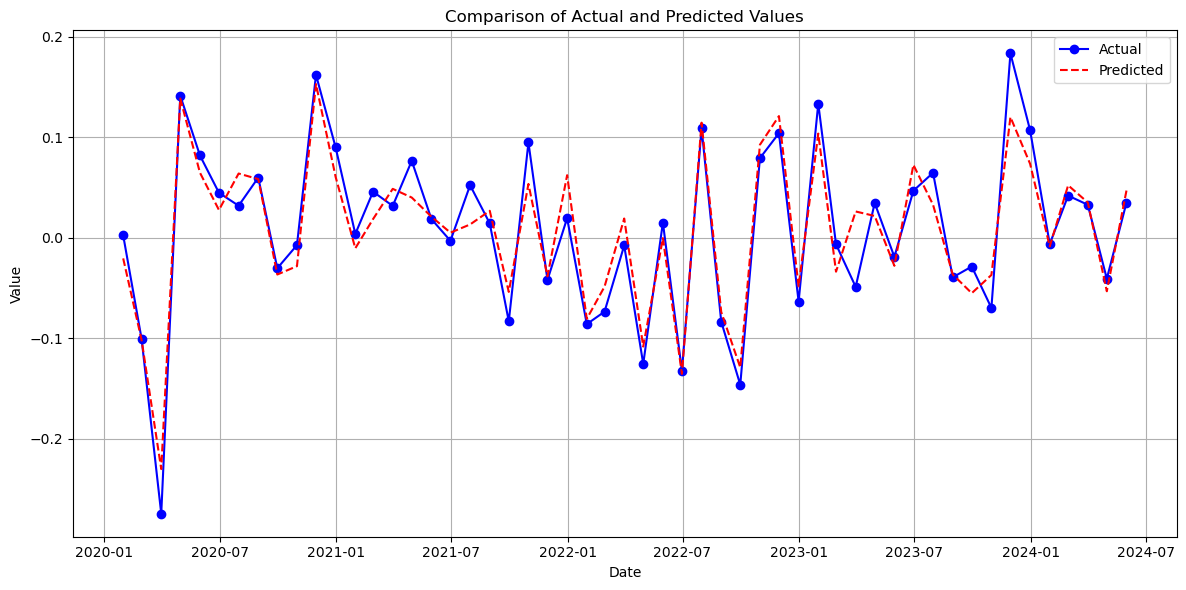

In [112]:
plt.figure(figsize=(12, 6))
plt.plot(y_OOS.index, y_OOS['PSP'], label='Actual', color='blue', marker='o')
plt.plot(y_OOS.index, y_OOS['Predicted Value'], label='Predicted', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.grid(True)
plt.tight_layout()